In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
from tensorflow.keras.datasets import mnist

In [48]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [49]:
X_train.shape

(60000, 28, 28)

In [50]:
y_train.shape

(60000,)

In [51]:
X_test.shape

(10000, 28, 28)

In [52]:
y_test.shape

(10000,)

In [53]:
single_image = X_train[0]

In [54]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

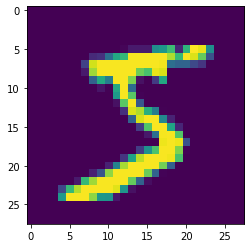

In [55]:
plt.imshow(single_image)

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

In [56]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [57]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this

In [58]:
from tensorflow.keras.utils import to_categorical

In [59]:
y_example = to_categorical(y_train)

In [60]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [61]:
y_example.shape

(60000, 10)

In [62]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [63]:
y_cat_test = to_categorical(y_test,10)

In [64]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

We should normalize the X data

In [65]:
single_image.max()

255

In [66]:
single_image.min()

0

In [67]:
X_train = X_train/255
X_test = X_test/255

In [68]:
scaled_image= X_train[0]

In [69]:
scaled_image.max()

1.0

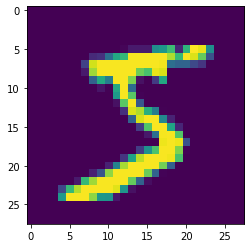

In [70]:
plt.imshow(scaled_image)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [71]:
X_train.shape

(60000, 28, 28)

In [72]:
X_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [73]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [74]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [75]:
X_train.shape

(60000, 28, 28, 1)

In [76]:
X_test.shape

(10000, 28, 28, 1)

## Creating Model

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [78]:
model=Sequential()

#CONVOLUTION LAYERS
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER for fully connected layer

model.add(Flatten())

#128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)

model.add(Dense(128,activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

#compliing 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [79]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [80]:
# prevent overfiiting  by using early stopping


In [81]:
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
early_stop =EarlyStopping(monitor='val_loss',patience=2)

## training model

In [83]:
model.fit(x=X_train,y=y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1482 - accuracy: 0.9550 - val_loss: 0.0567 - val_accuracy: 0.9810
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0499 - accuracy: 0.9853 - val_loss: 0.0434 - val_accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0377 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0369 - val_accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.0516 - val_accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.0529 - val_accuracy: 0.9857


In [ ]:
# model evalution

In [84]:
model.metrics_names

['loss', 'accuracy']

In [86]:
lossess= pd.DataFrame(model.history.history)

In [87]:
lossess.head()

,loss,accuracy,val_loss,val_accuracy
0,0.148197,0.955000,0.056734,0.9810
1,0.049900,0.985300,0.043371,0.9847
2,0.031402,0.990117,0.037721,0.9878
3,0.021760,0.992983,0.036944,0.9878
4,0.015543,0.994717,0.051569,0.9853
